<a href="https://colab.research.google.com/github/Sanchez-JC/Colab-Notebooks/blob/main/GPU_Poisson_eq_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import cupy as cp

# CREACIÓN DE LA MALLA
Npx = 500
Npy = 500

xa, xb = 0, 2
hx = (xb - xa) / (Npx - 1)
ya, yb = 0, 1
hy = (yb - ya) / (Npy - 1)

x = cp.linspace(xa, xb, Npx)
y = cp.linspace(ya, yb, Npy)

# NORMALIZACIÓN
phi_o = 100

# VARIABLES AUXILIARES
tol = 1e-6
it_max = 100000
cte_1 = 0.5 * hy**2 / (hx**2 + hy**2)
cte_2 = 0.5 * hx**2 / (hx**2 + hy**2)
cte_3 = 0.5 * (hx * hy)**2 / (hx**2 + hy**2)

# Función fuente
def SOURCE(x, y):
    return cp.zeros_like(x)  # Ejemplo de función fuente constante en 0

# Inicializar phi y phi_old
phi = cp.zeros((Npx, Npy))
phi_old = cp.zeros((Npx, Npy))

# CONDICIONES DE FRONTERA
phi[0, :] = 0  # Borde izquierdo
phi[-1, :] = 0  # Borde derecho
phi[:, 0] = 0  # Borde inferior
phi[:, -1] = 0  # Borde superior

######## BUCLE PRINCIPAL #######
def main():
    for it in range(it_max):
        # Guardar solución previa
        phi_old[:] = phi

        # Aplicar condiciones específicas con máscaras lógicas
        cond1 = (0.95 <= x[1:-1, None]) & (x[1:-1, None] <= 1.05) & (0 < y[None, 1:-1]) & (y[None, 1:-1] < 0.4)
        cond2 = (0.95 <= x[1:-1, None]) & (x[1:-1, None] <= 1.05) & (0.6 < y[None, 1:-1]) & (y[None, 1:-1] < 1)

        # Calcular phi excepto en la frontera
        phi[1:-1, 1:-1] = (
            cte_1 * (phi[2:, 1:-1] + phi[:-2, 1:-1]) +
            cte_2 * (phi[1:-1, 2:] + phi[1:-1, :-2]) -
            cte_3 * SOURCE(x[1:-1, None], y[None, 1:-1])
        )

        # Aplicar las condiciones específicas
        phi[1:-1, 1:-1][cond1 | cond2] = -1

        # Cálculo del error máximo
        err_max = cp.max(cp.abs(phi[1:-1, 1:-1] - phi_old[1:-1, 1:-1]))

        if err_max < tol:
            print("Progreso: 100 %")
            print("Solución encontrada en", it, "iteraciones")
            break

        # Mostrar progreso cada 10000 iteraciones
        if it % 1000 == 0:
            print("Progreso:", round(it / it_max * 100), "%")

    return

main()


Progreso: 0 %
Progreso: 1 %
Progreso: 2 %
Progreso: 3 %
Progreso: 4 %
Progreso: 5 %
Progreso: 6 %
Progreso: 7 %
Progreso: 8 %
Progreso: 9 %
Progreso: 10 %
Progreso: 11 %
Progreso: 12 %
Progreso: 13 %
Progreso: 14 %
Progreso: 15 %
Progreso: 16 %
Progreso: 17 %
Progreso: 18 %
Progreso: 19 %
Progreso: 20 %
Progreso: 21 %
Progreso: 22 %
Progreso: 23 %
Progreso: 24 %
Progreso: 25 %
Progreso: 26 %
Progreso: 27 %
Progreso: 28 %
Progreso: 29 %
Progreso: 30 %
Progreso: 31 %
Progreso: 32 %
Progreso: 33 %
Progreso: 34 %
Progreso: 35 %
Progreso: 36 %
Progreso: 37 %
Progreso: 38 %
Progreso: 39 %
Progreso: 40 %
Progreso: 41 %
Progreso: 42 %
Progreso: 43 %
Progreso: 44 %
Progreso: 45 %
Progreso: 46 %
Progreso: 47 %
Progreso: 48 %
Progreso: 49 %
Progreso: 50 %
Progreso: 51 %
Progreso: 52 %
Progreso: 53 %
Progreso: 54 %
Progreso: 55 %
Progreso: 56 %
Progreso: 57 %
Progreso: 58 %
Progreso: 59 %
Progreso: 60 %
Progreso: 61 %
Progreso: 62 %
Progreso: 63 %
Progreso: 64 %
Progreso: 65 %
Progreso: 66 %
Progr

In [42]:
PHI = cp.asnumpy(cp.rot90(phi * phi_o, k = -1))

Text(0.5, 1.0, '$\\Phi(x, y)$')

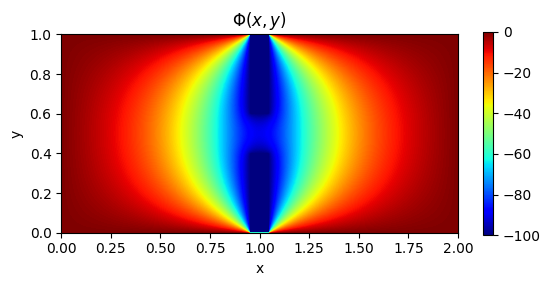

In [43]:
import matplotlib.pyplot as plt
plt.imshow(PHI, extent=[xa, xb, ya, yb], origin='lower', cmap='jet')
cbar = plt.colorbar(shrink=0.55)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$\Phi(x, y)$')